### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.color import rgb2gray

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

## Preprocessing

In [2]:
# Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# Let's check the image shape
train_images[0].shape

(32, 32, 3)

In [7]:
# Let's transform the data to black&white images

train_images_2 = rgb2gray(train_images)
test_images_2 = rgb2gray(test_images)

## Exercise 1

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [8]:
model1 = models.Sequential([
    layers.Conv2D(filters = 8,
                  kernel_size = (3, 3),
                  input_shape = (32, 32, 1),
                  padding = "valid"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(32, activation = "relu"),
    layers.Dense(10, activation = "softmax")

])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                57632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 58,042
Trainable params: 58,042
Non-trainable params: 0
____________________________________________________

In [9]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
train_images_3 = train_images_2.reshape(50000, 32, 32, 1)
test_images_3 = test_images_2.reshape(10000, 32, 32, 1)

In [11]:
history_model1 = model1.fit(train_images_3, train_labels, epochs = 5, validation_split = .1)

Epoch 1/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8888 - accuracy: 0.3150 - val_loss: 1.6757 - val_accuracy: 0.4110
Epoch 2/5
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6085 - accuracy: 0.4343 - val_loss: 1.5497 - val_accuracy: 0.4628
Epoch 3/5
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5083 - accuracy: 0.4736 - val_loss: 1.5601 - val_accuracy: 0.4440
Epoch 4/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4418 - accuracy: 0.4959 - val_loss: 1.4642 - val_accuracy: 0.4812
Epoch 5/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3982 - accuracy: 0.5095 - val_loss: 1.3933 - val_accuracy: 0.5080


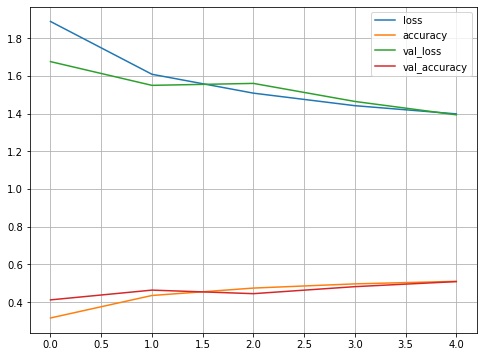

In [12]:
model1_stats = pd.DataFrame(history_model1.history)

model1_stats.plot(figsize = (8, 6))
plt.grid(True)
plt.show()

## Exercise 2

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [13]:
model2 = models.Sequential([
    layers.Conv2D(filters = 8,
                  kernel_size = (3, 3),
                  input_shape = (32, 32, 1),
                  padding = "same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(16, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(10, activation = "softmax")

])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [14]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history_model2 = model2.fit(train_images_3, train_labels, epochs = 5, validation_split = .1)

Epoch 1/5
1407/1407 [==============================] - 9s 6ms/step - loss: 2.0262 - accuracy: 0.2481 - val_loss: 1.7707 - val_accuracy: 0.3614
Epoch 2/5
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7062 - accuracy: 0.3891 - val_loss: 1.6336 - val_accuracy: 0.4164
Epoch 3/5
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5994 - accuracy: 0.4297 - val_loss: 1.5545 - val_accuracy: 0.4432
Epoch 4/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5280 - accuracy: 0.4556 - val_loss: 1.4982 - val_accuracy: 0.4620
Epoch 5/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4716 - accuracy: 0.4745 - val_loss: 1.4690 - val_accuracy: 0.4772


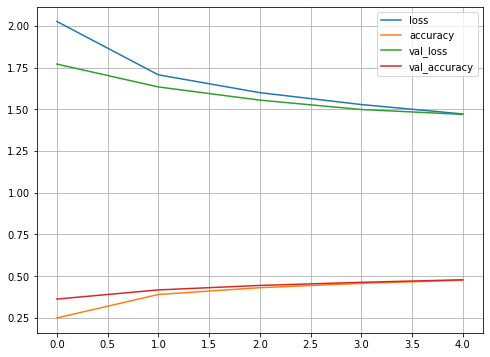

In [16]:
model2_stats = pd.DataFrame(history_model2.history)

model2_stats.plot(figsize = (8, 6))
plt.grid(True)
plt.show()

Both models perform quite poorly. Let's try it adding back the colors.

### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [17]:
train_images.shape

(50000, 32, 32, 3)

In [18]:
model3 = models.Sequential([
    layers.Conv2D(filters = 8,
                  kernel_size = (3, 3),
                  input_shape = (32, 32, 3),
                  padding = "same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(32, activation = "relu"),
    layers.Dense(10, activation = "softmax")

])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 66,122
Trainable params: 66,122
Non-trainable params: 0
__________________________________________________

In [19]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history_model3 = model3.fit(train_images, train_labels, epochs = 5, validation_split = .1)

Epoch 1/5
1407/1407 [==============================] - 10s 7ms/step - loss: 3.1514 - accuracy: 0.0997 - val_loss: 2.3156 - val_accuracy: 0.0958
Epoch 2/5
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3060 - accuracy: 0.0971 - val_loss: 2.3028 - val_accuracy: 0.0958
Epoch 3/5
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 4/5
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 5/5
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3030 - val_accuracy: 0.0950


It seems like adding color just makes the data noisy for the ANN.